https://medium.com/@yuce.ahmet.tr/exploring-rfm-analysis-methodologies-and-innovative-approaches-360f82fc536b

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Customer-Segmentation-with-RFM-metrics" data-toc-modified-id="Customer-Segmentation-with-RFM-metrics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Customer Segmentation with RFM metrics</a></span><ul class="toc-item"><li><span><a href="#Find-Recency,-Frequency,-Monetary-of-each-Customer" data-toc-modified-id="Find-Recency,-Frequency,-Monetary-of-each-Customer-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Find Recency, Frequency, Monetary of each Customer</a></span></li><li><span><a href="#Add-'r_quartile',-'f_quartile',-'m_quartile'-columns-to-the-RFM_Table:" data-toc-modified-id="Add-'r_quartile',-'f_quartile',-'m_quartile'-columns-to-the-RFM_Table:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Add 'r_quartile', 'f_quartile', 'm_quartile' columns to the RFM_Table:</a></span></li><li><span><a href="#Combine-RFM-quartiles-and-add-as-a-new-column-to-the-RFM-Table:" data-toc-modified-id="Combine-RFM-quartiles-and-add-as-a-new-column-to-the-RFM-Table:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Combine RFM quartiles and add as a new column to the RFM Table:</a></span></li><li><span><a href="#Define-Customer-Segments-using-RFM-quartiles" data-toc-modified-id="Define-Customer-Segments-using-RFM-quartiles-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Define Customer Segments using RFM quartiles</a></span></li><li><span><a href="#Alternative-code-snippets-for-RFM-Analysis" data-toc-modified-id="Alternative-code-snippets-for-RFM-Analysis-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Alternative code snippets for RFM Analysis</a></span></li></ul></li></ul></div>

<p style="color: blue; font-weight: bold; font-size: 24px;">PART I – TRADITIONAL RFM PRACTICES</p>

<p style="color: red; text-align: center; font-weight: bold; font-size: 24px;">CUSTOMER SEGMENTATION WITH RFM METRICS</p>


***The primary goal of RFM analysis*** is to segment customers into distinct groups based on their behaviors and transaction histories. By categorizing customers according to these three metrics, businesses gain valuable insights into varying customer segments:

***- Identification of High-Value Customers:*** RFM analysis helps identify and prioritize high-value customers who contribute significantly to the business's revenue streams. These customers often exhibit recent activity, frequent transactions, and substantial monetary contributions.

***- Personalized Marketing Strategies:*** Segmentation through RFM analysis enables businesses to tailor marketing strategies and campaigns based on the distinct needs and behaviors of different customer segments. This personalization enhances customer engagement and satisfaction.

***- Retention and Loyalty Programs:*** Understanding customer behavior through RFM analysis aids in developing targeted retention and loyalty programs. By recognizing and nurturing loyal customers or re-engaging dormant ones, businesses can enhance customer retention rates.

# Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv("Online Retail.csv", dtype={'CustomerID': str})        
df.drop(columns="Unnamed: 0", inplace=True) 

https://archive.ics.uci.edu/dataset/352/online+retail

In [3]:
df = df[~df.duplicated()]

In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365.0,22752.0,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365.0,21730.0,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366.0,22633.0,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366.0,22632.0,HAND WARMER RED POLKA DOT,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367.0,84879.0,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  float64
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  object 
 7   Country      536641 non-null  object 
dtypes: float64(2), object(6)
memory usage: 36.8+ MB


In [6]:
def missing (df):   # created to display the missing values as a percentage
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values
missing (df)

,Missing_Number,Missing_Percent
CustomerID,135037,25.163377
Description,1454,0.270945
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [7]:
df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].str.replace('\.0$', '', regex=True)

In [8]:
# Basic descriptive statistics:
print((df.select_dtypes(include=['number']).quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T))
# There are negative values in the Quantity and Price columns.These transactions are canceled orders.
# We'll eliminate these observations.

              0.00  0.05  0.50  0.95   0.99     1.00
Quantity  -80995.0  1.00  5.00  36.0  120.0  80995.0
UnitPrice      0.0  0.42  1.95   8.5   15.0  38970.0


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) 

In [10]:
# Info about dataset
def data_info (df):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    print("Info about dataset :")
    print("Count Row \t\t:", df.shape[0]) 
    print("Count Column \t\t:", df.shape[1]) 
    print("Date range from \t:", df.InvoiceDate.min(), " to ", df.InvoiceDate.max()) 
    print("Count Transactions \t:", df.InvoiceNo.nunique()) 
    print("Unique Customer \t:", df.CustomerID.nunique()) 
    print("Quantity range from \t:", df.Quantity.min(), " to ", df.Quantity.max()) 
    print("UnitPrice range from \t:", df.UnitPrice.min(), " to ", df.UnitPrice.max())
    
data_info(df)

Info about dataset :
Count Row 		: 401604
Count Column 		: 8
Date range from 	: 2010-12-01 08:26:00  to  2011-12-09 12:50:00
Count Transactions 	: 22190
Unique Customer 	: 4372
Quantity range from 	: -80995.0  to  80995.0
UnitPrice range from 	: 0.0  to  38970.0


In [11]:
df[(df.Quantity < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556.0,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984.0,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983.0,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144.0,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1.0,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258.0,VICTORIAN SEWING BOX LARGE,-5.0,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978.0,HANGING HEART JAR T-LIGHT HOLDER,-1.0,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [12]:
# With this operation, we can drop the rows containing canceled orders.
df = df[(df.Quantity > 0)]

In [13]:
# Create a TotalSales Column if there is not in the data set:
df["Revenue"] = df["UnitPrice"] * df["Quantity"]

In [14]:
data_info(df)

Info about dataset :
Count Row 		: 392732
Count Column 		: 9
Date range from 	: 2010-12-01 08:26:00  to  2011-12-09 12:50:00
Count Transactions 	: 18536
Unique Customer 	: 4339
Quantity range from 	: 1.0  to  80995.0
UnitPrice range from 	: 0.0  to  8142.75


In [15]:
# Checking dataframe:
df.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,392732.0,13.153718,181.588420,1.0,1.00,2.00,6.00,12.00,120.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,0.21,1.25,1.95,3.75,14.95,8142.75
Revenue,392732.0,22.629195,311.083465,0.0,0.55,4.95,12.39,19.80,203.52,168469.60


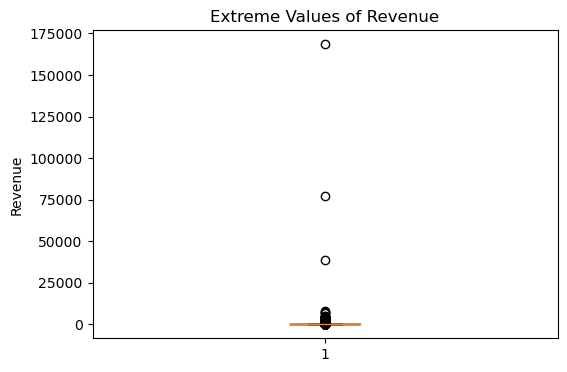

In [16]:
# See the extreme Revenues.
plt.figure(figsize=(6, 4))
plt.boxplot(df['Revenue'])
plt.title('Extreme Values of Revenue')  
plt.ylabel('Revenue')  
plt.show();

In [17]:
df[(df.Revenue>25000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
61619,541431.0,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6
222680,556444.0,22502.0,PICNIC BASKET WICKER 60 PIECES,60.0,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
540421,581483.0,23843.0,"PAPER CRAFT , LITTLE BIRDIE",80995.0,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6


# Customer Segmentation with RFM metrics

***RFM, which stands for Recency, Frequency, and Monetary, is a data-driven technique utilized by businesses to categorize and segment their customer base. At its core, RFM analysis quantifies customer behavior based on three key parameters:***

***1. Recency (R):*** This metric evaluates the time elapsed since a customer's last interaction or transaction with the business. It emphasizes the principle that more recent interactions may indicate higher engagement or responsiveness.

***2. Frequency (F):*** Frequency assesses the number of interactions or transactions conducted by a customer within a defined period. It sheds light on how often customers engage with the business, indicating loyalty or buying habits.

***3. Monetary (M):*** Monetary value represents the total spending or monetary contribution of a customer over a specific timeframe. It signifies the customer's profitability or the potential revenue they bring to the business.

Because the last transaction on the data was December 9, 2011, we will use December 10, 2011 as now to calculate the recency.

In [18]:
# We will create this RFM Table:

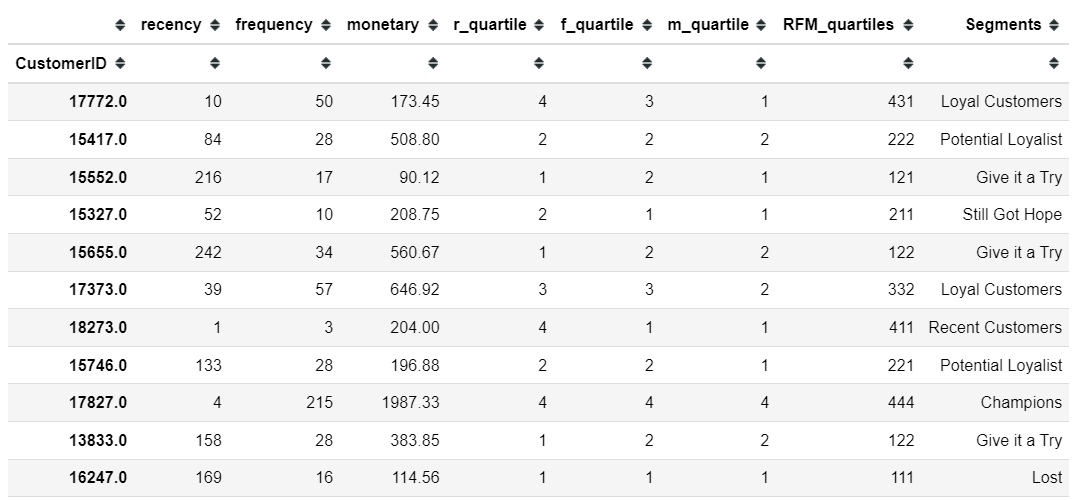

In [19]:
# Now, let's proceed step by step

## Find Recency, Frequency, Monetary of each Customer

In [20]:
NOW = df['InvoiceDate'].max()              # NOW = dt.datetime(2011,12,09)

In [21]:
RFM_Table = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: max((NOW - x.max()).days, 1),  # Not to get a recency with zero value, min recency will be 1.
    'InvoiceNo': lambda x: len(x),
    'Revenue': lambda x: x.sum()
})

RFM_Table['InvoiceDate'] = RFM_Table['InvoiceDate'].astype(int)

RFM_Table.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'Revenue': 'monetary'}, inplace=True)

In [22]:
RFM_Table[(RFM_Table.recency==0)]

,recency,frequency,monetary
CustomerID,,,


In [23]:
RFM_Table.head()

,recency,frequency,monetary
CustomerID,,,
12346,325,1,77183.60
12347,1,182,4310.00
12348,74,31,1797.24
12349,18,73,1757.55
12350,309,17,334.40


***We can interpret the first customer in the table above as follows: This customer has made a single purchase(frequency=1) in total, and it has been 325 days(recency=325) since that purchase without any subsequent transactions, indicating that he/she is a lost customer.***

In [24]:
RFM_Table.sort_values(by="monetary", ascending=False)

,recency,frequency,monetary
CustomerID,,,
14646,1,2080,280206.02
18102,1,431,259657.30
17450,7,336,194390.79
16446,1,3,168472.50
14911,1,5672,143711.17
...,...,...,...
17956,248,1,12.75
16454,44,2,6.90
14792,63,2,6.20


***We observe the top 5 customers who have made the highest total purchases. Except for customer 16446 in the fourth row, these customers appear to be loyal due to their high frequency and very low recency values. Customer 16446, who has made a total of 3 purchases and made his/her last purchase yesterday, seems to be a potentially valuable new customer. However, it wouldn't be possible to definitively confirm his/her status as a new customer solely based on this RFM Table without looking at his/her prior purchase dates.***

In [25]:
RFM_Table.describe().round(2)

,recency,frequency,monetary
count,4339.00,4339.00,4339.00
mean,91.54,90.51,2048.22
std,99.99,225.52,8984.25
min,1.00,1.00,0.00
25%,17.00,17.00,306.46
50%,50.00,41.00,668.56
75%,141.00,98.00,1660.32
max,373.00,7676.00,280206.02


## Add 'r_quartile', 'f_quartile', 'm_quartile' columns to the RFM_Table:

***We will use the quartile method to create segments. We will split our customers into 4 segments.***

<img src="https://www.mathsisfun.com/data/images/quartiles-c.gif" />

In [26]:
# Cut RFM metrics into 4 groups and label them:
rfm_q = RFM_Table.copy()
rfm_q["r_quartile"] = pd.qcut(rfm_q["recency"], 4, labels=[4, 3, 2, 1])
rfm_q["f_quartile"] = pd.qcut(rfm_q["frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm_q["m_quartile"] = pd.qcut(rfm_q["monetary"], 4, labels=[1, 2, 3, 4])

In [27]:
rfm_q

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346,325,1,77183.60,1,1,4
12347,1,182,4310.00,4,4,4
12348,74,31,1797.24,2,2,4
12349,18,73,1757.55,3,3,4
12350,309,17,334.40,1,1,2
...,...,...,...,...,...,...
18280,277,10,180.60,1,1,1
18281,180,7,80.82,1,1,1
18282,7,12,178.05,4,1,1


The code above uses qcut() function to identify the cutting thresholds (quartiles). Let’s look at the code:

***rfm_q["r_quartile"] = pd.qcut(rfm_q["recency"], 4, labels=[4, 3, 2, 1]):*** Divides the "recency" column into 4 quartiles using `pd.qcut()`. Assigns labels 4, 3, 2, 1 to these quartiles, where 4 represents the most recent customers and 1 represents the least recent.

***rfm_q["f_quartile"] = pd.qcut(rfm_q["frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4]):*** Calculates the rank of the "frequency" column and divides it into 4 quartiles using `pd.qcut()`. Assigns labels 1, 2, 3, 4 to these quartiles, likely ordering customers by their frequency, where 1 represents the least frequent and 4 represents the most frequent.

***rfm_q["m_quartile"] = pd.qcut(rfm_q["monetary"], 4, labels=[1, 2, 3, 4]):*** Divides the "monetary" column into 4 quartiles using `pd.qcut()`. Assigns labels 1, 2, 3, 4 to these quartiles, where 1 represents the lowest-spending customers and 4 represents the highest-spending.

This approach enables the segmentation of customers into four distinct groups based on their RFM metrics, allowing for easier analysis and identification of customer behavior patterns.

##  Combine RFM quartiles and add as a new column to the RFM Table:

In [28]:
# Combine RFM quartiles and add as a new column

RFM = rfm_q.copy()
RFM["RFM_quartiles"] =  RFM['r_quartile'].astype(str) +\
                        RFM['f_quartile'].astype(str) +\
                        RFM['m_quartile'].astype(str)

In [29]:
RFM

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_quartiles
CustomerID,,,,,,,
12346,325,1,77183.60,1,1,4,114
12347,1,182,4310.00,4,4,4,444
12348,74,31,1797.24,2,2,4,224
12349,18,73,1757.55,3,3,4,334
12350,309,17,334.40,1,1,2,112
...,...,...,...,...,...,...,...
18280,277,10,180.60,1,1,1,111
18281,180,7,80.82,1,1,1,111
18282,7,12,178.05,4,1,1,411


In [30]:
# Display Top 5 Customers based on RFM_quartiles, sort by Monetary

In [31]:
RFM[RFM['RFM_quartiles']=='444'].sort_values('monetary', ascending=False).head()


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_quartiles
CustomerID,,,,,,,
14646,1,2080,280206.02,4,4,4,444
18102,1,431,259657.30,4,4,4,444
17450,7,336,194390.79,4,4,4,444
14911,1,5672,143711.17,4,4,4,444
14156,9,1395,117210.08,4,4,4,444


In [32]:
# Display the transactions of Nu.1 Customer (CustomerID 14646)

In [33]:
top_customer = df[df['CustomerID'] == "14646"]
top_customer.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
37952,539491.0,21981.0,PACK OF 12 WOODLAND TISSUES,12.0,2010-12-20 10:09:00,0.29,14646,Netherlands,3.48
37953,539491.0,21986.0,PACK OF 12 PINK POLKADOT TISSUES,12.0,2010-12-20 10:09:00,0.29,14646,Netherlands,3.48
37954,539491.0,22720.0,SET OF 3 CAKE TINS PANTRY DESIGN,2.0,2010-12-20 10:09:00,4.95,14646,Netherlands,9.90
37955,539491.0,21931.0,JUMBO STORAGE BAG SUKI,1.0,2010-12-20 10:09:00,1.95,14646,Netherlands,1.95
37956,539491.0,22613.0,PACK OF 20 SPACEBOY NAPKINS,2.0,2010-12-20 10:09:00,0.85,14646,Netherlands,1.70
37957,539491.0,20751.0,FUNKY WASHING UP GLOVES ASSORTED,1.0,2010-12-20 10:09:00,2.10,14646,Netherlands,2.10
37958,539491.0,21246.0,RED RETROSPOT BIG BOWL,2.0,2010-12-20 10:09:00,4.95,14646,Netherlands,9.90
37959,539491.0,22960.0,JAM MAKING SET WITH JARS,1.0,2010-12-20 10:09:00,4.25,14646,Netherlands,4.25
37960,539491.0,22355.0,CHARLOTTE BAG SUKI DESIGN,2.0,2010-12-20 10:09:00,0.85,14646,Netherlands,1.70
37961,539491.0,21123.0,SET/10 IVORY POLKADOT PARTY CANDLES,2.0,2010-12-20 10:09:00,1.25,14646,Netherlands,2.50


## Define Customer Segments using RFM quartiles

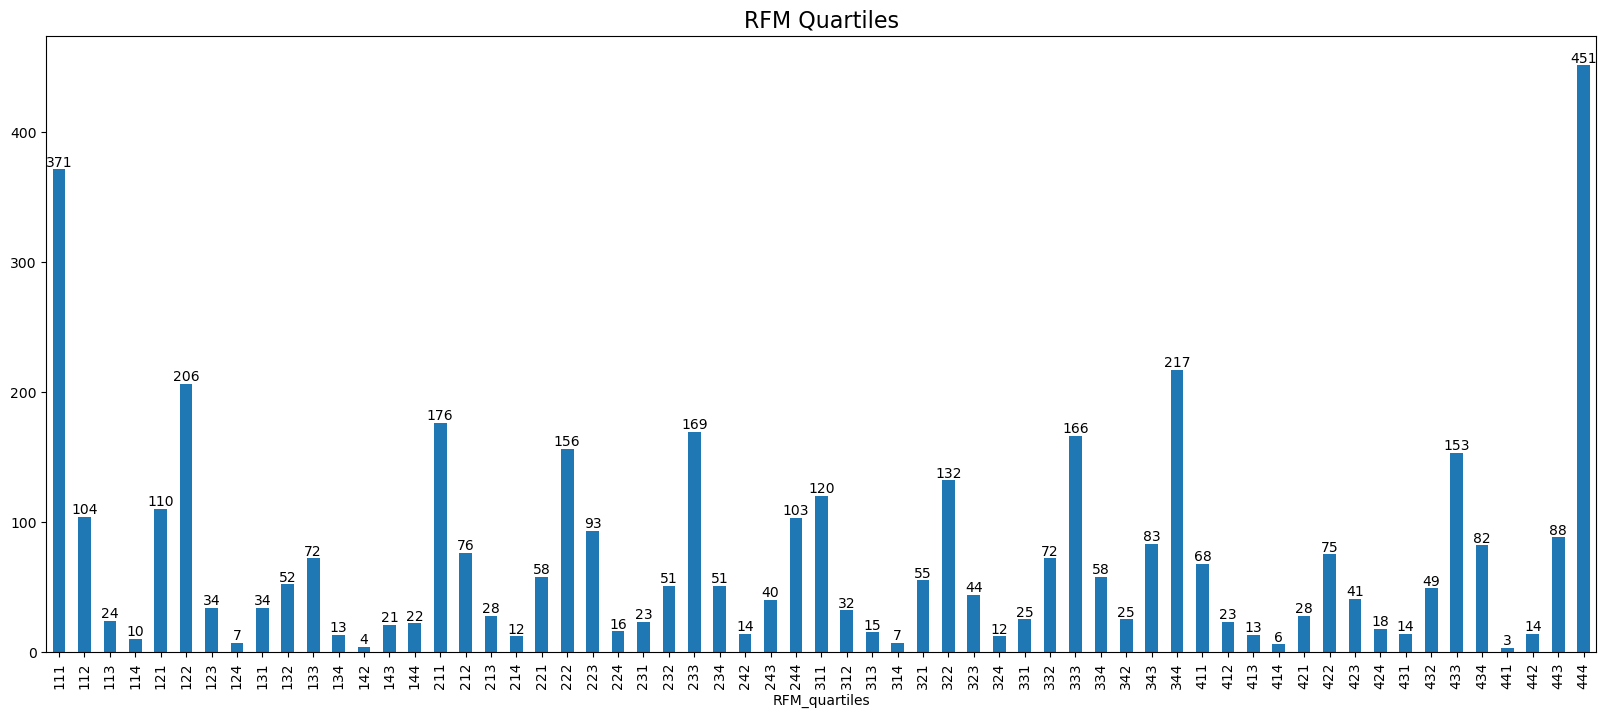

In [34]:
plt.figure(figsize=(20, 8))
ax=RFM.groupby(['RFM_quartiles']).size().plot.bar()
plt.title("RFM Quartiles", fontsize=16)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f");

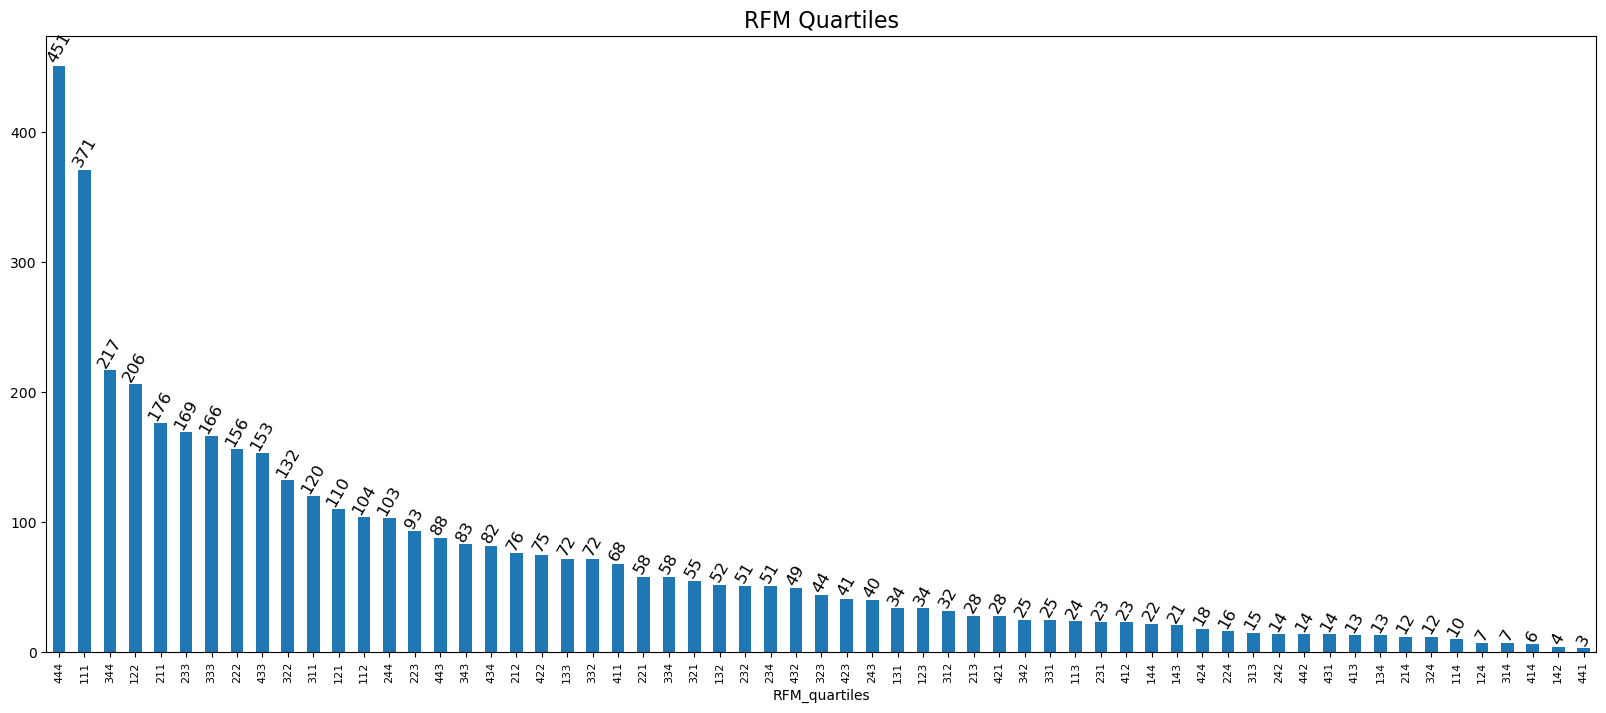

In [35]:
plt.figure(figsize=(20, 8))
ax=RFM.groupby(['RFM_quartiles']).size().sort_values(ascending=False).plot.bar()
plt.title("RFM Quartiles", fontsize=16)

for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", fontsize=12, rotation=60)
plt.xticks(rotation = 90, fontsize=8);

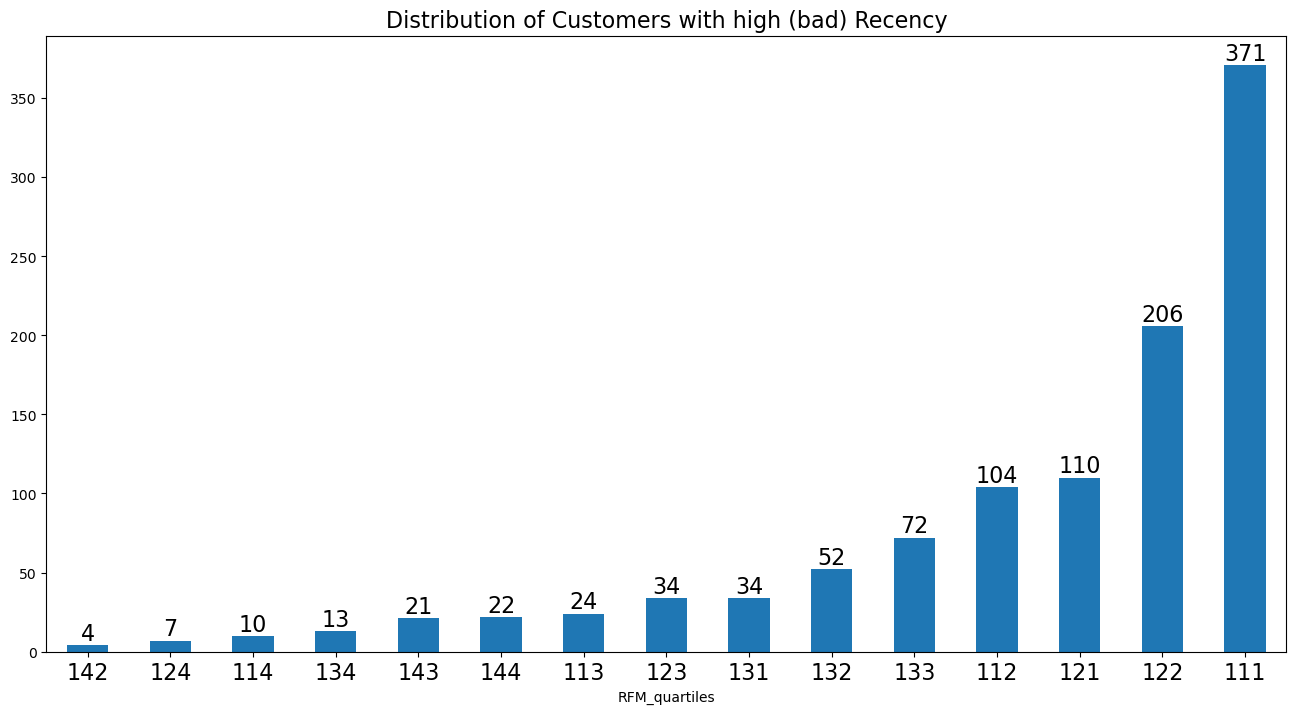

In [36]:
plt.figure(figsize=(16, 8))
ax=RFM.groupby(['RFM_quartiles']).size()[0:15].sort_values().plot.bar()
plt.title("Distribution of Customers with high (bad) Recency", fontsize=16)
plt.xticks(rotation = 0, fontsize=16);
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f",fontsize=16);

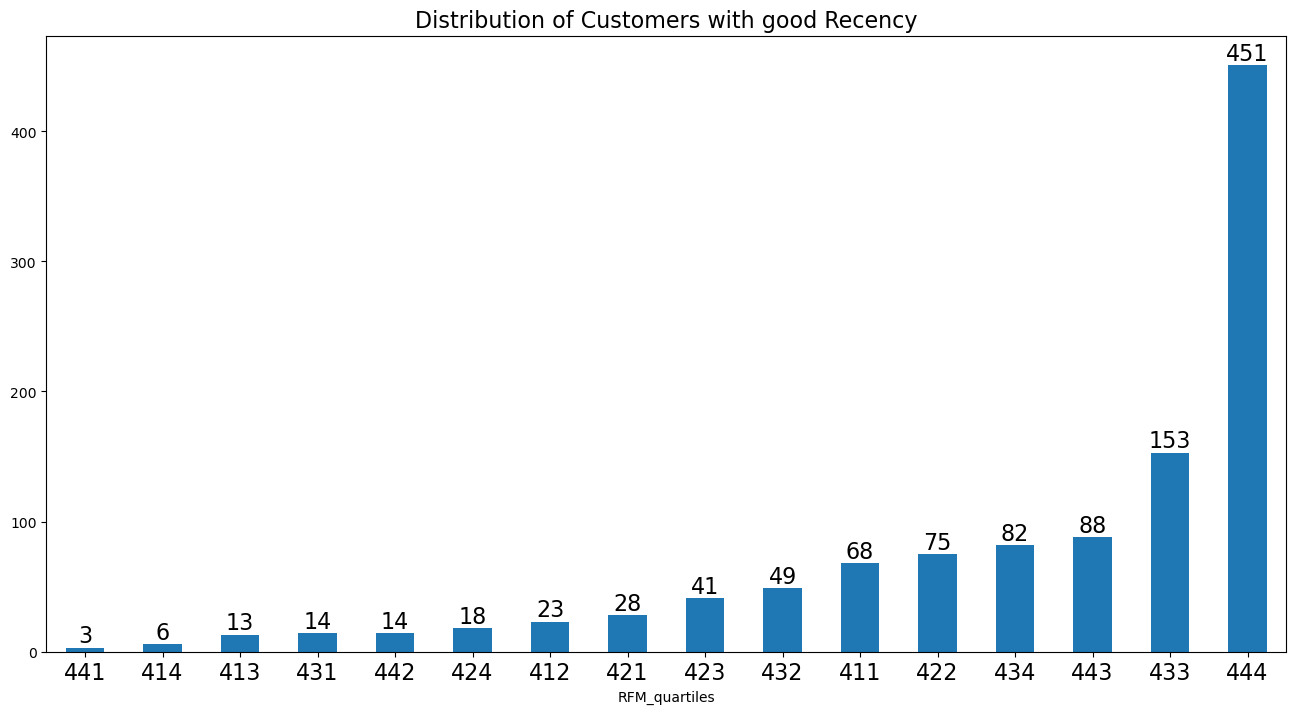

In [37]:
plt.figure(figsize=(16, 8))
ax=RFM.groupby(['RFM_quartiles']).size()[45:61].sort_values().plot.bar()
plt.title("Distribution of Customers with good Recency", fontsize=16)
plt.xticks(rotation = 0, fontsize=16);
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f",fontsize=16);

In [38]:
Segments = {
             'Segments':
                                ['Champions',
                                 'Loyal Customers',
                                 'Potential Loyalist', 
                                 'Recent Customers', 
                                 'Customers Needing Attention', 
                                 'Still Got Hope', 
                                 'Need to Get Them Back',
                                 'Give it a Try',
                                 'Lost'],\
                           'RFM_quartiles':
                                ['(3|4)-(3|4)-(3|4)', 
                                 '(3|4)-(3|4)-(1|2|3|4)', 
                                 '(2|3|4)-(2|3)-(1|2|3|4)', 
                                 '(4)-(1)-(1|2|3|4)', 
                                 '(2|3)-(2|3)-(2|3)', 
                                 '(2|3)-(1|2)-(1|2|3|4)', 
                                 '(1|2)-(3|4)-(2|3|4)', 
                                 '(1|2)-(1|2|3|4)-(1|2|3|4)',
                                 '(1)-(1)-(1|2|3|4)']
            }
pd.DataFrame(Segments)

,Segments,RFM_quartiles
0,Champions,(3|4)-(3|4)-(3|4)
1,Loyal Customers,(3|4)-(3|4)-(1|2|3|4)
2,Potential Loyalist,(2|3|4)-(2|3)-(1|2|3|4)
3,Recent Customers,(4)-(1)-(1|2|3|4)
4,Customers Needing Attention,(2|3)-(2|3)-(2|3)
5,Still Got Hope,(2|3)-(1|2)-(1|2|3|4)
6,Need to Get Them Back,(1|2)-(3|4)-(2|3|4)
7,Give it a Try,(1|2)-(1|2|3|4)-(1|2|3|4)
8,Lost,(1)-(1)-(1|2|3|4)


In [39]:
def classifier(rfm):
    if (rfm[0] in ['3', '4'])   & (rfm[1] in ['3', '4']) & (rfm[2] in ['3', '4']):            rfm = 'Champions'
        
    elif (rfm[0] in ['3', '4']) & (rfm[1] in ['3', '4']) & (rfm[2] in ['1', '2', '3', '4']):  rfm = 'Loyal Customers'
        
    elif (rfm[0] in ['2','3','4']) & (rfm[1] in ['2','3']) & (rfm[2] in ['1','2','3', '4']):  rfm = 'Potential Loyalist'
    
    elif (rfm[0] in ['4'])      & (rfm[1] in ['1'])      & (rfm[2] in ['1', '2', '3', '4']):  rfm = 'Recent Customers'
    
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['2', '3']) & (rfm[2] in ['2', '3']):        rfm = 'Customers Needing Attention'
    
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2']) & (rfm[2] in ['1', '2', '3', '4']):  rfm = 'Still Got Hope'
    
    elif (rfm[0] in ['1', '2']) & (rfm[1] in ['3', '4']) & (rfm[2] in ['2', '3', '4']):       rfm = 'Need to Get Them Back'
                
    elif (rfm[0] in ['1'])      & (rfm[1] in ['1'])      & (rfm[2] in ['1', '2','3','4']):    rfm = 'Lost'
    
    elif (rfm[0] in ['1', '2']) & (rfm[1] in ['1','2','3','4']) & (rfm[2] in ['1','2','3','4']):rfm = 'Give it a Try'
        
    return rfm 

In [40]:
segmented_rfm = RFM.copy()
segmented_rfm['Segments'] = segmented_rfm["RFM_quartiles"].apply(classifier)

In [41]:
segmented_rfm.sample(15)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_quartiles,Segments
CustomerID,,,,,,,,
14250,6,111,1904.05,4,4,4,444,Champions
13110,30,145,1488.67,3,4,3,343,Champions
13332,13,21,350.90,4,2,2,422,Potential Loyalist
16003,29,103,2735.37,3,4,4,344,Champions
15584,23,122,720.86,3,4,3,343,Champions
17419,10,206,4226.57,4,4,4,444,Champions
12380,21,104,2724.81,3,4,4,344,Champions
12956,305,19,108.07,1,2,1,121,Give it a Try
12577,34,146,626.60,3,4,2,342,Loyal Customers


In [42]:
segmented_rfm["Segments"].value_counts(dropna=False)

Champions                1298
Potential Loyalist       1022
Lost                      509
Still Got Hope            466
Give it a Try             391
Need to Get Them Back     341
Loyal Customers           202
Recent Customers          110
Name: Segments, dtype: int64

In [43]:
segmented_rfm.groupby('Segments').agg({'recency':'mean','frequency':'mean',
                                    'monetary':['mean','count']}).round(1)

recency frequency monetary      
                         mean      mean     mean count
Segments                                              
Champions                16.4     212.9   4928.1  1298
Give it a Try           245.5      28.9    438.9   391
Lost                    256.7       8.4    589.7   509
Loyal Customers          21.8      77.5    442.9   202
Need to Get Them Back   152.1     119.6   1845.4   341
Potential Loyalist       60.1      38.2    854.9  1022
Recent Customers          9.1       9.2   2135.6   110
Still Got Hope           65.7       9.2    410.7   466

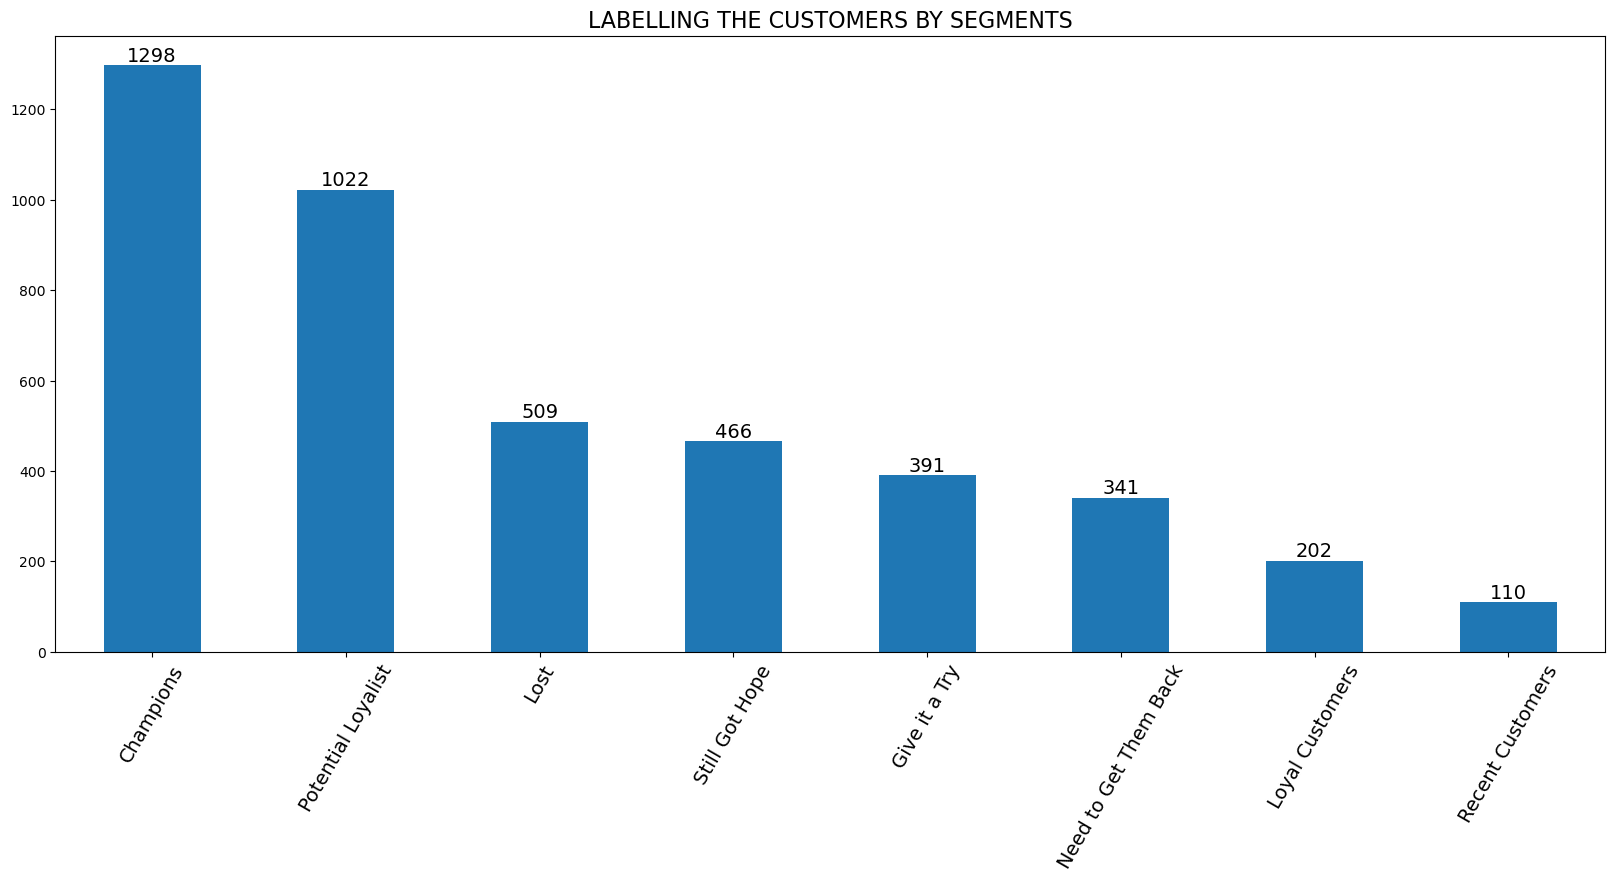

In [44]:
plt.figure(figsize=(20, 8))
ax=segmented_rfm["Segments"].value_counts().plot.bar()
plt.title("LABELLING THE CUSTOMERS BY SEGMENTS", fontsize=16)
# ax=rfm.groupby(['Segments']).size().sort_values(ascending=False).plot.bar()
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", fontsize=14)
plt.xticks(rotation = 60, fontsize=14);

In [45]:
# pip install squarify

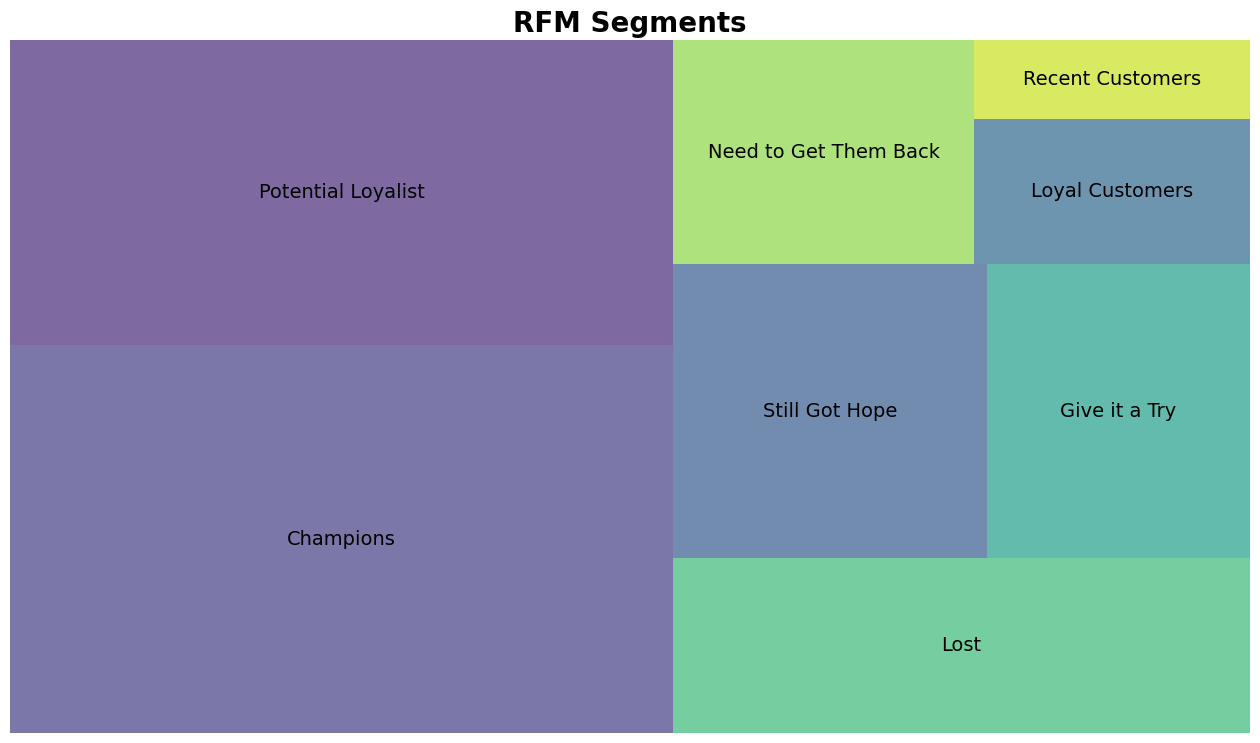

In [46]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=list(segmented_rfm["Segments"].value_counts().values), 
              label=list(segmented_rfm["Segments"].value_counts().index), alpha=0.7,
              text_kwargs={'fontsize':14})
plt.title("RFM Segments", fontsize=20, fontweight="bold")
plt.axis('off')
plt.show()

## Alternative code snippets for RFM Analysis

In [ ]:
import datetime as dt

# Create a TotalSales Column if there is not in the data set:
# df["Revenue"] = df["UnitPrice"] * df["Quantity"]

NOW = df['InvoiceDate'].max()

# Calculate RFM values and rename columns
RFM_Table = df.groupby('CustomerID').agg(recency   = ('InvoiceDate', lambda x: (NOW - x.max()).days),
                                        frequency = ('InvoiceNo', 'count'),
                                        monetary  = ('Revenue', 'sum') 
                                       ).astype({'recency': int})

# Define R and FM Segmneting Functions:
def R_Segmenting(x,p,d):             
    if   x <= d[p][0.25]:   return 4               
    elif x <= d[p][0.50]:   return 3
    elif x <= d[p][0.75]:   return 2
    else                :   return 1
    
def FM_Segmenting(x,p,d):
    if   x <= d[p][0.25]:   return 1
    elif x <= d[p][0.50]:   return 2
    elif x <= d[p][0.75]:   return 3
    else                :   return 4

# Alternative code for functions:    
# def RScore(x, p, d):return next((score for score, percentile in enumerate([0.25,0.5,0.75,1], 1) if x <= d[p][percentile]),1)
# def FMScore(x, p, d):return next((score for score, percentile in enumerate([0.25,0.5,0.75,1], 1) if x <= d[p][percentile]),4)


# Calculate R and FM quartiles and add as new columns
quantiles = RFM_Table.quantile(q=[0.25, 0.5, 0.75]).to_dict()
rfm_q = RFM_Table.copy()
rfm_q['r_quartile'] = rfm_q['recency'].  apply(R_Segmenting,  args=('recency',   quantiles,))
rfm_q['f_quartile'] = rfm_q['frequency'].apply(FM_Segmenting, args=('frequency', quantiles,))
rfm_q['m_quartile'] = rfm_q['monetary']. apply(FM_Segmenting, args=('monetary',  quantiles,))

# Create RFM_quartiles column
RFM = rfm_q.copy()
RFM['RFM_quartiles'] = RFM.r_quartile.map(str)+\                # RFM.r_quartile.astype(str) + \
                       RFM.f_quartile.map(str)+\
                       RFM.m_quartile.map(str)

                                                                                                     Ahmet Yüce       
                                                                                                     Data Scientist